# Clustering Models
## K-means 
### Setting up for clustering analysis

In [23]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.cluster import KMeans

from sklearn import datasets
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [24]:
X, y_true = make_blobs(n_samples=1000, centers=4,cluster_std=1.60, random_state=0)
print(X.shape, y_true.shape)

(1000, 2) (1000,)


Plotting the data (we assume we do not know the labels/clusters):

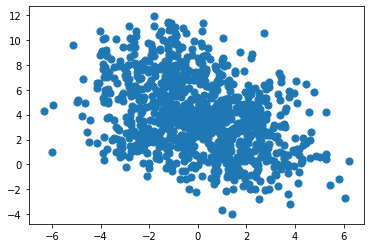

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=50);

In [26]:
# Building the k-Means model
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Getting predictions and center of clusters
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
print(y_kmeans.shape, centers.shape)

(1000,) (4, 2)


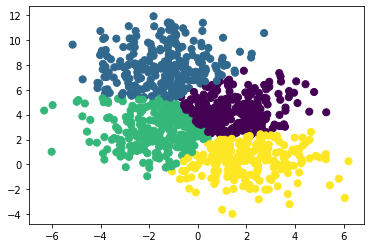

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')


Plotting the clusters and corresponding centroids:

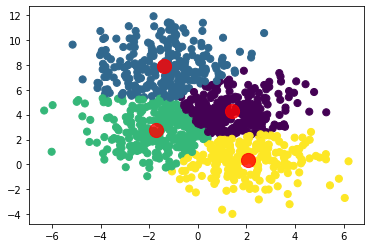

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8);

Because k-means knows nothing about the identity of the cluster, the labels may be permuted (labels/color of cluster might be differet). We can fix this by matching each learned cluster label with the true labels found in them:

In [29]:
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(n_clusters):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]

Printing reports and performance metric values:

In [30]:
print('Accuracy score is:',accuracy_score(y_true, labels))


Accuracy score is: 0.763


Visualization of the confusion matrix:

(1000,) (1000,)


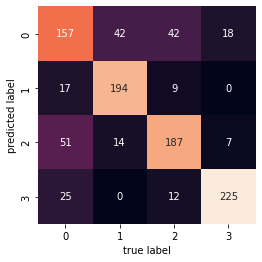

In [34]:

conf_mat = confusion_matrix(y_true, labels)
sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(n_clusters),
            yticklabels=range(n_clusters))
plt.xlabel('true label')
plt.ylabel('predicted label');
print(y_true.shape, labels.shape)

The classification report:

In [32]:
print('The classification report is:\n',classification_report(y_true, labels))

The classification report is:
               precision    recall  f1-score   support

           0       0.61      0.63      0.62       250
           1       0.88      0.78      0.83       250
           2       0.72      0.75      0.73       250
           3       0.86      0.90      0.88       250

    accuracy                           0.76      1000
   macro avg       0.77      0.76      0.76      1000
weighted avg       0.77      0.76      0.76      1000

